# A full process of supervised machine learning model from data cleaning to performance evaluation

### 1. Import data and necessary library:

In [1]:
from datetime import datetime
statime=datetime.now()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [8]:
path = os.getcwd()
print('LOAD DURATION: ', datetime.now() - statime)

LOAD DURATION:  0:06:06.507042


In [9]:
%%time
mydata = pd.read_csv(path+'/card transactions.csv')
mydata = mydata.iloc[:,0:10]

CPU times: user 158 ms, sys: 32.6 ms, total: 191 ms
Wall time: 192 ms


In [10]:
mydata.shape

(96753, 10)

In [11]:
mydata.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [12]:
mydata.Fraud.mean()

0.010945397041952187

In [13]:
mydata.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Recnum,1,2,3,4,5,6,7,8,9,10
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439,5142149874,5142189277,5142191182,5142258629,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254,5509006296254,5509006296254,6098208200062,602608969534,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#,FEDEX SHP 12/22/09 AB#,FEDEX SHP 12/28/09 AB#,MIAMI COMPUTER SUPPLY,FISHER SCI ATL,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN,TN,TN,OH,GA,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0,38118.0,38118.0,45429.0,30091.0,38118.0
Transtype,P,P,P,P,P,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62,3.67,3.62,230.32,62.11,3.62
Fraud,0,0,0,0,0,0,0,0,0,0


In [18]:
import numpy as np
np.set_printoptions(suppress=True)

In [19]:
mydata.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


In [20]:
mydata.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

In [21]:
len(mydata['Fraud'].unique())

2

In [22]:
mydata['Recnum'].value_counts()

2049     1
21856    1
7529     1
5480     1
28007    1
        ..
31386    1
25241    1
27288    1
4759     1
2047     1
Name: Recnum, Length: 96753, dtype: int64

______________

### 2. Sample of Data Quality Report:

In [24]:
plt.rcParams["figure.figsize"] = [12,6]
sns.set(font_scale=2)

Text(0, 0.5, 'count')

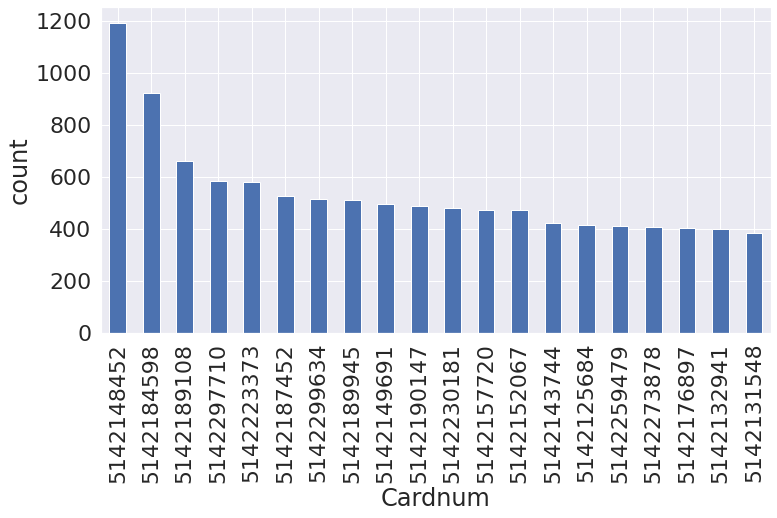

In [25]:
mydata['Cardnum'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Cardnum')
plt.ylabel('count')

In [26]:
mydata['Cardnum'].value_counts().head(20).sum()/96753

0.11108699471851002

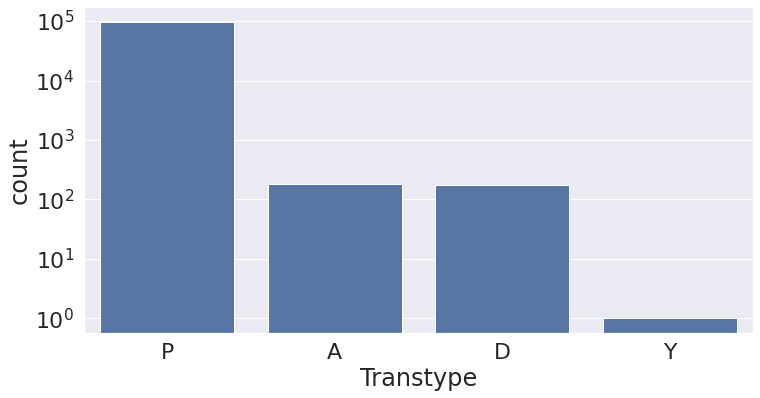

In [27]:
plot = sns.countplot(x='Transtype', data = mydata, color = 'b', order = mydata['Transtype'].value_counts().index)
plot.set_yscale('log')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


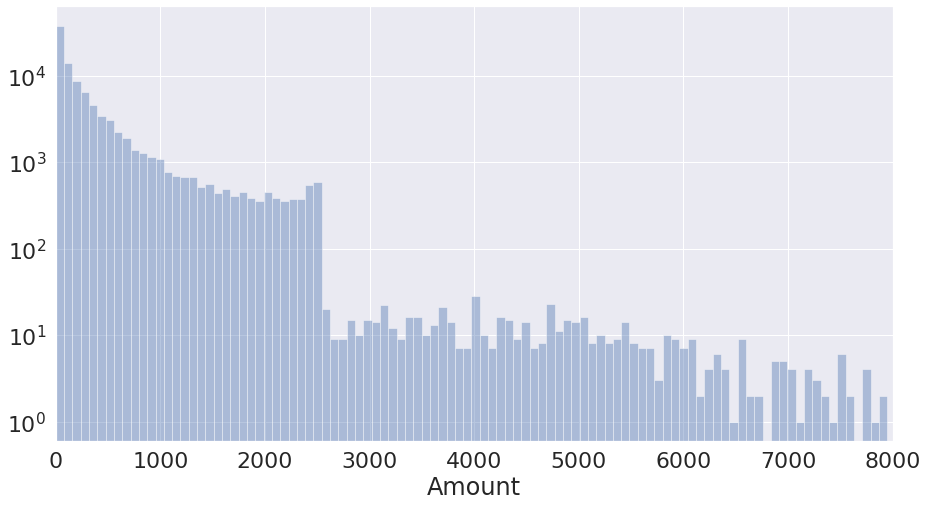

In [28]:
plt.rcParams["figure.figsize"] = [15,8]
xhigh = 8000
plt.xlim(0,xhigh)
temp = mydata[mydata['Amount'] <= xhigh]
sns.distplot(temp['Amount'],bins=100, kde=False).set_yscale('log')

In [29]:
x = (mydata['Amount'] <= 8000)
x.mean()

0.9987803995741734

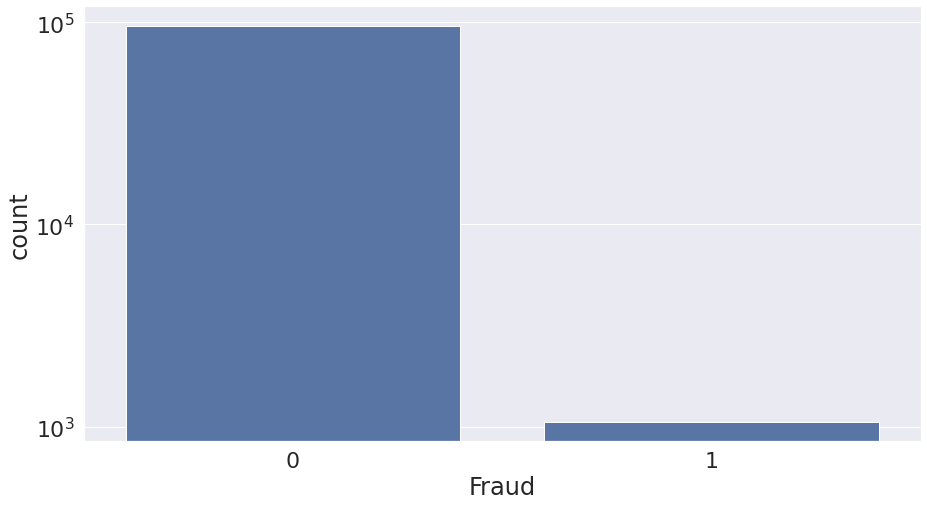

In [30]:
plot = sns.countplot(x='Fraud', data = mydata, color = 'b', order = mydata['Fraud'].value_counts().index)
plot.set_yscale('log')

_______

### 3. Data Clean:

In [34]:
df = pd.read_csv(path+'/card transactions.csv')
df = df.loc[: ,"Recnum":"Fraud"]
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


### Identify any exclusions, bad records

Remove single large transaction outlier, and remove all but the “P” type transactions.

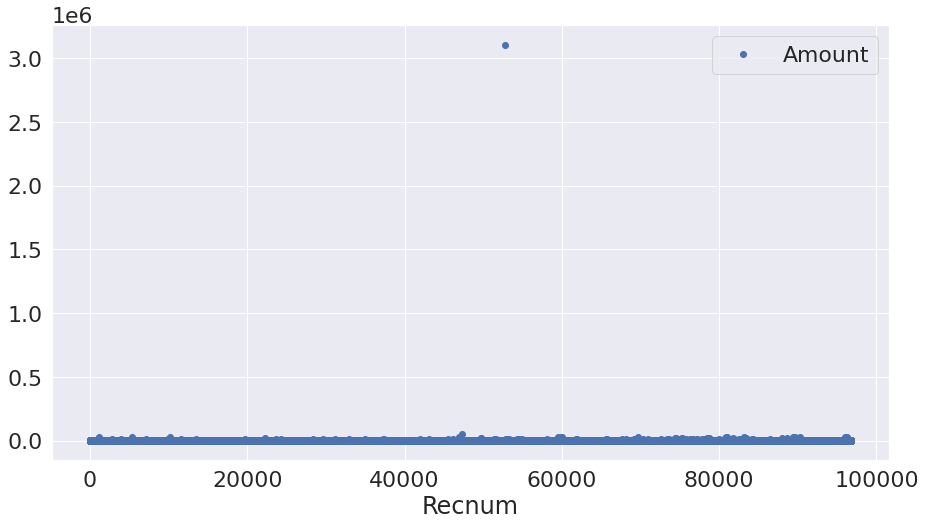

In [35]:
# plot the outlier
df.plot(x ='Recnum', y='Amount', style='o')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [36]:
# get the outlier
max(df['Amount'])

3102045.53

In [37]:
# remove single large transaction outlier
df = df[df['Amount'] != 3102045.53]

In [38]:
# remove All but the “P” type transactions
df = df[df['Transtype'] == 'P']
len(df)

96397

### Fill in missing values (Zip, Merchnum, State).

Use common sense, good logic to do this.

Need to fill in missing values for Merchnum, Merch state, Merch zip with with mode of merchant number

In [39]:
print((df['Merch zip'] == '0').sum())
print((df['Merch zip'] == 'Unk').sum())
print(df['Merch zip'].isna().sum())

0
0
4300


In [40]:
df['Merch zip'] = df.groupby(['Merch description'])['Merch zip'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unk'))

In [41]:
print((df['Merch zip'] == '0').sum())
print((df['Merch zip'] == 'Unk').sum())
print(df['Merch zip'].isna().sum())

0
2043
0


Merch state:

•If the record has a zip, use the state for that zip, if known

•If in range 00600 – 00799, 00900 – 00999: state = PR (Puerto Rico)

•Use the mode of the Merchnum or Merch description

•Fill in with “Unk” for unknown

In [42]:
print((df['Merch state'] == 'Unk').sum())
print(df['Merch state'].isna().sum())

0
1020


In [43]:
# get the zip code when the state is NaN
df_state = df[df['Merch state'].isna()][df[df['Merch state'].isna()]['Merch zip'].notna()]
df_state

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
262,263,5142257575,1/4/10,NaN,RETAIL DEBIT ADJUSTMENT,NaN,Unk,P,320.00,0
272,273,5142124791,1/4/10,NaN,RETAIL DEBIT ADJUSTMENT,NaN,Unk,P,970.00,0
400,401,5142276099,1/4/10,NaN,RETAIL DEBIT ADJUSTMENT,NaN,Unk,P,82.59,0
476,477,5142267793,1/5/10,NaN,RETAIL DEBIT ADJUSTMENT,NaN,Unk,P,17.59,0
487,488,5142267793,1/5/10,NaN,RETAIL CREDIT ADJUSTMENT,NaN,7.0,P,19.69,0
...,...,...,...,...,...,...,...,...,...,...
96360,96361,5142225264,12/29/10,NaN,RETAIL CREDIT ADJUSTMENT,NaN,7.0,P,317.80,0
96563,96564,5142211003,12/30/10,NaN,RETAIL DEBIT ADJUSTMENT,NaN,Unk,P,168.00,0
96603,96604,5142182645,12/30/10,NaN,RETAIL CREDIT ADJUSTMENT,NaN,7.0,P,229.25,0
96651,96652,5142151962,12/30/10,NaN,RETAIL DEBIT ADJUSTMENT,NaN,Unk,P,125.00,0


In [44]:
df_state['Merch zip'].value_counts()

Unk        566
7.0        357
6.0         10
934.0        8
2.0          7
926.0        7
936.0        5
12108.0      5
60528.0      4
9.0          4
738.0        3
791.0        3
38117.0      3
680.0        3
86899.0      3
90805.0      2
801.0        2
1.0          2
48700.0      2
929.0        2
907.0        2
23080.0      2
681.0        1
95461.0      1
1400.0       1
3.0          1
8.0          1
902.0        1
623.0        1
65132.0      1
726.0        1
76302.0      1
914.0        1
920.0        1
41160.0      1
922.0        1
50823.0      1
31040.0      1
19007.0      1
32505.0      1
Name: Merch zip, dtype: int64

In [45]:
# make the state of zip code 00600 – 00799, 00900 – 00999 PR
# 15
df[(df['Merch zip']==934.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==934.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==926.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==926.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==936.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==936.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==738.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==738.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==791.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==791.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==680.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==680.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==907.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==907.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==929.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==929.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==922.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==922.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==914.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==914.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==920.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==920.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==623.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==623.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==726.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==726.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==681.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==681.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')
df[(df['Merch zip']==902.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==902.0) & (df['Merch state'].isnull())].replace(np.nan, 'PR')

In [46]:
# get the other state 
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase()

df[(df['Merch zip']==12108.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==12108.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[12108].state)
#df[(df['Merch zip']==60528.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==60528.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[60528].state)
df[(df['Merch zip']==38117.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==38117.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[38117].state)
#df[(df['Merch zip']==86899.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==86899.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[86899].state)
#df[(df['Merch zip']==48700.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==48700.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[48700].state)
#df[(df['Merch zip']==23080.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==23080.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[23080].state)
df[(df['Merch zip']==90805.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==90805.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[90805].state)
#df[(df['Merch zip']==65132.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==65132.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[65132].state)
#df[(df['Merch zip']==50823.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==50823.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[50823].state)
df[(df['Merch zip']==41160.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==41160.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[41160].state)
df[(df['Merch zip']==31040.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==31040.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[31040].state)
df[(df['Merch zip']==76302.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==76302.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[76302].state)
df[(df['Merch zip']==95461.0) & (df['Merch state'].isnull())] = df[(df['Merch zip']==95461.0) & (df['Merch state'].isnull())].replace(np.nan, zcdb[95461].state)

In [47]:
# get the rest of them the mode, or unknown
df['Merch state'] = df.groupby(['Merch description'])['Merch state'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unk'))

In [48]:
print((df['Merch state'] == '0').sum())
print((df['Merch state'] == 'Unk').sum())
print(df['Merch state'].isna().sum())

0
310
0


Merchnum:

•If = 0, replace with NaN

•Fill in with mode of Merch description

•Fill in with unknown

In [49]:
print((df['Merchnum'] == '0').sum())
print((df['Merchnum'] == 'Unk').sum())
print(df['Merchnum'].isna().sum())

53
0
3188


In [50]:
df['Merchnum'] = df['Merchnum'].replace('0', np.nan)

In [51]:
df['Merchnum'] = df.groupby(['Merch description'])['Merchnum'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unk'))

In [52]:
print((df['Merchnum'] == '0').sum())
print((df['Merchnum'] == 'Unk').sum())
print(df['Merchnum'].isna().sum())

0
2084
0


In [53]:
df.count()

Recnum               96397
Cardnum              96397
Date                 96397
Merchnum             96397
Merch description    96397
Merch state          96397
Merch zip            96397
Transtype            96397
Amount               96397
Fraud                96397
dtype: int64

___

### 4. Variables Engineering I —— Creating big enough amount of variables:

Create all variables

Example:

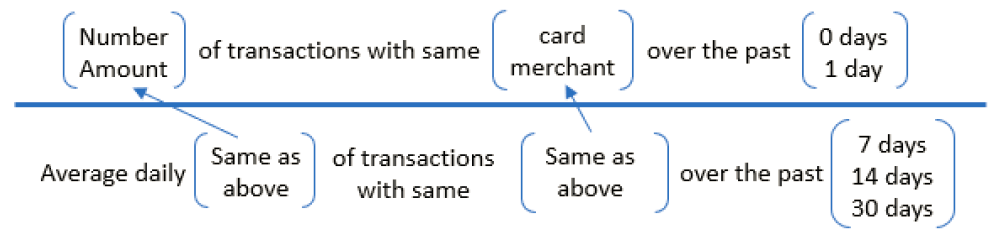

In [54]:
df['card_merch'] = df['Cardnum'].astype(str) + df['Merchnum']
df['card_zip'] = df['Cardnum'].astype(str) + df['Merch zip'].astype(str)
df['card_state'] = df['Cardnum'].astype(str) + df['Merch state']
df['merch_zip'] = df['Merchnum'] + df['Merch zip'].astype(str)
df['merch_state'] = df['Merchnum'] + df['Merch state']
df['merch_transtype'] = df['Merchnum'] + df['Transtype']
df['card_transtype'] = df['Cardnum'].astype(str) + df['Transtype']
df.Date = pd.to_datetime(df.Date)
df1 = df.copy()
final = df.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum

In [55]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'card_merch', 'card_zip', 'card_state', 'merch_zip', 'merch_state',
       'merch_transtype', 'card_transtype'],
      dtype='object')

In [56]:
df1.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'card_merch', 'card_zip', 'card_state', 'merch_zip', 'merch_state',
       'merch_transtype', 'card_transtype', 'check_date', 'check_record'],
      dtype='object')

In [57]:
final.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'card_merch', 'card_zip', 'card_state', 'merch_zip', 'merch_state',
       'merch_transtype', 'card_transtype'],
      dtype='object')

In [58]:
#entities = df1[['card_merch', 'card_zip', 'card_state', 'Merchnum', 'Cardnum']]
entities1 = df1[['merch_state', 'Merchnum', 'Cardnum']]
entities2 = df1[['card_merch', 'card_zip']]
entities3 = df1[['card_state', 'merch_zip']]
entities4 = df1[['merch_transtype']]
entities5 = df1[['card_transtype']]

In [59]:
import timeit
import datetime as dt
start = timeit.default_timer()

for entity in entities1:        
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))    
    except: print('')    
    st = timeit.default_timer()
    
    ## Day-since variables:       
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]        
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)       
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date', 'check_date']].last()    
    mapper = (temp1.Date - temp1.check_date).dt.days    
    final[entity + '_day_since'] = final.Recnum.map(mapper)    
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)    
    print('\n' + entity + '_day_since ---> Done')       
    
    ## Frequency & Amount variables:       
    for time in [0,1,3,7,14,30]:               
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]               
        col_name = entity + '_count_' + str(time)            
        mapper2 = temp2.groupby('Recnum')[entity].count()              
        final[col_name] = final.Recnum.map(mapper2)                
        print(col_name + ' ---> Done')               
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())        
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())        
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())        
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())        
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]        
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]        
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]        
        final[entity + '_actual/total_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]               
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))



merch_state_day_since ---> Done
merch_state_count_0 ---> Done
merch_state amount variables over past 0 ---> Done
merch_state_count_1 ---> Done
merch_state amount variables over past 1 ---> Done
merch_state_count_3 ---> Done
merch_state amount variables over past 3 ---> Done
merch_state_count_7 ---> Done
merch_state amount variables over past 7 ---> Done
merch_state_count_14 ---> Done
merch_state amount variables over past 14 ---> Done
merch_state_count_30 ---> Done
merch_state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 40.00587952323258s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum amount variables over past 0 ---> Done
Merchnum_count_1 ---> Done
Merchnum amount variables over past 1 ---> Done
Merchnum_count_3 ---> Done
Merchnum amount variables over past 3 ---> Done
Merchnum_count_7 ---> Done
Merchnum amount variables over past 7 ---> Done
Merchnum_count_14 ---> Done
Merchnum amount variables over past 14 ---> Done
Mer

In [60]:
import timeit
import datetime as dt
start = timeit.default_timer()

for entity in entities2:        
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))    
    except: print('')    
    st = timeit.default_timer()
    
    ## Day-since variables:       
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]        
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)       
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date', 'check_date']].last()    
    mapper = (temp1.Date - temp1.check_date).dt.days    
    final[entity + '_day_since'] = final.Recnum.map(mapper)    
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)    
    print('\n' + entity + '_day_since ---> Done')       
    
    ## Frequency & Amount variables:       
    for time in [0,1,3,7,14,30]:               
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]               
        col_name = entity + '_count_' + str(time)            
        mapper2 = temp2.groupby('Recnum')[entity].count()              
        final[col_name] = final.Recnum.map(mapper2)                
        print(col_name + ' ---> Done')               
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())        
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())        
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())        
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())        
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]        
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]        
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]        
        final[entity + '_actual/total_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]               
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 6.135292775928974s

card_merch_day_since ---> Done
card_merch_count_0 ---> Done
card_merch amount variables over past 0 ---> Done
card_merch_count_1 ---> Done
card_merch amount variables over past 1 ---> Done
card_merch_count_3 ---> Done
card_merch amount variables over past 3 ---> Done
card_merch_count_7 ---> Done
card_merch amount variables over past 7 ---> Done
card_merch_count_14 ---> Done
card_merch amount variables over past 14 ---> Done
card_merch_count_30 ---> Done
card_merch amount variables over past 30 ---> Done
Run time for the last entity ----------------- 2.0348882228136063s

card_zip_day_since ---> Done
card_zip_count_0 ---> Done
card_zip amount variables over past 0 ---> Done
card_zip_count_1 ---> Done
card_zip amount variables over past 1 ---> Done
card_zip_count_3 ---> Done
card_zip amount variables over past 3 ---> Done
card_zip_count_7 ---> Done
card_zip amount variables over past 7 ---> Done
card_zip_count_14 ---> Done

In [61]:
import timeit
import datetime as dt
start = timeit.default_timer()

for entity in entities3:        
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))    
    except: print('')    
    st = timeit.default_timer()
    
    ## Day-since variables:       
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]        
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)       
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date', 'check_date']].last()    
    mapper = (temp1.Date - temp1.check_date).dt.days    
    final[entity + '_day_since'] = final.Recnum.map(mapper)    
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)    
    print('\n' + entity + '_day_since ---> Done')       
    
    ## Frequency & Amount variables:       
    for time in [0,1,3,7,14,30]:               
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]               
        col_name = entity + '_count_' + str(time)            
        mapper2 = temp2.groupby('Recnum')[entity].count()              
        final[col_name] = final.Recnum.map(mapper2)                
        print(col_name + ' ---> Done')               
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())        
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())        
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())        
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())        
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]        
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]        
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]        
        final[entity + '_actual/total_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]               
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 2.265512192621827s

card_state_day_since ---> Done
card_state_count_0 ---> Done
card_state amount variables over past 0 ---> Done
card_state_count_1 ---> Done
card_state amount variables over past 1 ---> Done
card_state_count_3 ---> Done
card_state amount variables over past 3 ---> Done
card_state_count_7 ---> Done
card_state amount variables over past 7 ---> Done
card_state_count_14 ---> Done
card_state amount variables over past 14 ---> Done
card_state_count_30 ---> Done
card_state amount variables over past 30 ---> Done
Run time for the last entity ----------------- 3.0448558125644922s

merch_zip_day_since ---> Done
merch_zip_count_0 ---> Done
merch_zip amount variables over past 0 ---> Done
merch_zip_count_1 ---> Done
merch_zip amount variables over past 1 ---> Done
merch_zip_count_3 ---> Done
merch_zip amount variables over past 3 ---> Done
merch_zip_count_7 ---> Done
merch_zip amount variables over past 7 ---> Done
merch_zip_count_14

In [62]:
import timeit
import datetime as dt
start = timeit.default_timer()

for entity in entities4:        
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))    
    except: print('')    
    st = timeit.default_timer()
    
    ## Day-since variables:       
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]        
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)       
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date', 'check_date']].last()    
    mapper = (temp1.Date - temp1.check_date).dt.days    
    final[entity + '_day_since'] = final.Recnum.map(mapper)    
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)    
    print('\n' + entity + '_day_since ---> Done')       
    
    ## Frequency & Amount variables:       
    for time in [0,1,3,7,14,30]:               
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]               
        col_name = entity + '_count_' + str(time)            
        mapper2 = temp2.groupby('Recnum')[entity].count()              
        final[col_name] = final.Recnum.map(mapper2)                
        print(col_name + ' ---> Done')               
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())        
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())        
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())        
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())        
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]        
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]        
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]        
        final[entity + '_actual/total_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]               
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 37.75604581087828s

merch_transtype_day_since ---> Done
merch_transtype_count_0 ---> Done
merch_transtype amount variables over past 0 ---> Done
merch_transtype_count_1 ---> Done
merch_transtype amount variables over past 1 ---> Done
merch_transtype_count_3 ---> Done
merch_transtype amount variables over past 3 ---> Done
merch_transtype_count_7 ---> Done
merch_transtype amount variables over past 7 ---> Done
merch_transtype_count_14 ---> Done
merch_transtype amount variables over past 14 ---> Done
merch_transtype_count_30 ---> Done
merch_transtype amount variables over past 30 ---> Done
Total run time: 0.675277738707761mins


In [63]:
import timeit
import datetime as dt
start = timeit.default_timer()

for entity in entities5:        
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))    
    except: print('')    
    st = timeit.default_timer()
    
    ## Day-since variables:       
    df_l = df1[['Recnum', 'Date', entity]]    
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]        
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)       
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date', 'check_date']].last()    
    mapper = (temp1.Date - temp1.check_date).dt.days    
    final[entity + '_day_since'] = final.Recnum.map(mapper)    
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)    
    print('\n' + entity + '_day_since ---> Done')       
    
    ## Frequency & Amount variables:       
    for time in [0,1,3,7,14,30]:               
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]               
        col_name = entity + '_count_' + str(time)            
        mapper2 = temp2.groupby('Recnum')[entity].count()              
        final[col_name] = final.Recnum.map(mapper2)                
        print(col_name + ' ---> Done')               
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())        
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())        
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())        
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())        
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]        
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]        
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]        
        final[entity + '_actual/total_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]               
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 40.55933774076402s

card_transtype_day_since ---> Done
card_transtype_count_0 ---> Done
card_transtype amount variables over past 0 ---> Done
card_transtype_count_1 ---> Done
card_transtype amount variables over past 1 ---> Done
card_transtype_count_3 ---> Done
card_transtype amount variables over past 3 ---> Done
card_transtype_count_7 ---> Done
card_transtype amount variables over past 7 ---> Done
card_transtype_count_14 ---> Done
card_transtype amount variables over past 14 ---> Done
card_transtype_count_30 ---> Done
card_transtype amount variables over past 30 ---> Done
Total run time: 0.12095151903728645mins


In [64]:
start = timeit.default_timer()
    
# velocity change variables
for ent in entities1:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.02785143442451954s


In [65]:
start = timeit.default_timer()
    
# velocity change variables
for ent in entities2:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.01681380532681942s


In [66]:
start = timeit.default_timer()
    
# velocity change variables
for ent in entities3:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.017278291285037994s


In [67]:
start = timeit.default_timer()
    
# velocity change variables
for ent in entities4:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.008804980665445328s


In [68]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
final.columns[:20]

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'card_merch', 'card_zip', 'card_state', 'merch_zip', 'merch_state',
       'merch_transtype', 'card_transtype', 'merch_state_day_since',
       'merch_state_count_0', 'merch_state_avg_0'],
      dtype='object')

In [69]:
final.shape

(96397, 560)

In [70]:
variables = final.loc[: ,"merch_state_day_since":"merch_zip_count_1_by_30"]
variables.shape

(96397, 537)

Now 537 different variables are created.

In [71]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [72]:
variables.describe().T

,count,mean,std,min,25%,50%,75%,max
merch_state_day_since,96397.0,30.103219,66.109213,0.000000,0.000000,2.000000,20.000000,364.000000
merch_state_count_0,96397.0,6.802297,18.993611,1.000000,1.000000,1.000000,3.000000,260.000000
merch_state_avg_0,96397.0,395.396365,762.069102,0.010000,39.780000,158.550000,451.080000,28392.840000
merch_state_max_0,96397.0,500.830251,997.360483,0.010000,55.520000,191.550000,573.240000,47900.000000
merch_state_med_0,96397.0,381.787873,751.707014,0.010000,36.210000,147.000000,422.140000,28392.840000
...,...,...,...,...,...,...,...,...
merch_zip_count_0_by_14,96397.0,0.034794,0.028212,0.000071,0.007937,0.023810,0.071429,0.071429
merch_zip_count_0_by_30,96397.0,0.013255,0.012984,0.000019,0.001974,0.007407,0.033333,0.033333
merch_zip_count_1_by_7,96397.0,0.092616,0.049325,0.000298,0.047619,0.093407,0.142857,0.142857
merch_zip_count_1_by_14,96397.0,0.038043,0.026779,0.000086,0.013158,0.035040,0.071429,0.071429


In [73]:
variables_stats = variables.describe().T[['min','max','mean','std']]
variables_stats

,min,max,mean,std
merch_state_day_since,0.000000,364.000000,30.103219,66.109213
merch_state_count_0,1.000000,260.000000,6.802297,18.993611
merch_state_avg_0,0.010000,28392.840000,395.396365,762.069102
merch_state_max_0,0.010000,47900.000000,500.830251,997.360483
merch_state_med_0,0.010000,28392.840000,381.787873,751.707014
...,...,...,...,...
merch_zip_count_0_by_14,0.000071,0.071429,0.034794,0.028212
merch_zip_count_0_by_30,0.000019,0.033333,0.013255,0.012984
merch_zip_count_1_by_7,0.000298,0.142857,0.092616,0.049325
merch_zip_count_1_by_14,0.000086,0.071429,0.038043,0.026779


In [75]:
variables.to_csv('Variables.csv')

Create Benford variables even though Benford Law does not apply in this case. Benford variables can be added to filter too.

In [102]:
df = pd.read_csv(path+'/transactions_clean.csv')

In [103]:
#df str contains str
flt = []
for x in df['Merch description']:
    flt.append('FEDEX' not in x)
    #flt.append('FEDEX SHP' not in x)
df = df[flt]
df.shape

(84622, 11)

In [104]:
first = df['Amount'].astype('str')
fd = []
for x in first:
    if x[0] != '0':
        fd.append(x[0])
    elif ((x[0] == '0') and (x[2] != '0')):
        fd.append(x[2])
    else:
        fd.append(x[3])

In [105]:
fdigit = pd.DataFrame(fd)
fdigit.columns = ['first_digit']
fdigit = fdigit.reset_index()
df = df.reset_index()
df1 = pd.concat([df,fdigit], axis = 1)
df1

,index,Unnamed: 0,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,index,first_digit
0,1,1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,0,3
1,2,2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,1,1
2,7,7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,2,2
3,8,8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,3,6
4,13,13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84617,96392,96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,84617,8
84618,96393,96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,84618,1
84619,96394,96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,84619,3
84620,96395,96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,84620,2


In [106]:
def benfordstat(series, n_mid=15, c=3):
    count_low=sum(pd.to_numeric(series)<=2)
    count_all=len(series)
    count_high = sum(pd.to_numeric(series)>2)
    if count_low == 0:
        count_low = 1
    if count_all == 0:
        count_all = 1
    if count_high == 0:
        count_high = 1
    r=1.096 * count_low/count_high
    u = max(r,(1/r))
    t=(count_all-n_mid)/c
    new_u=1+((u-1)/(1+np.exp(-t)))
    stat = pd.DataFrame(
        {'n_low':[count_low],
        'n_high':[count_high],
        'R' : [r],
        '1/R' : [1/r],
        'U' : [u],
        'n' : [count_all],
        't' : [t],
        'U*' : [new_u]}
    )
    return(stat)

In [107]:
CN_stat = df1.groupby(['Cardnum'])['first_digit'].apply(benfordstat).reset_index()
out1 = CN_stat.sort_values(by = 'U*', ascending = False).head(40)
MN_stat = df1.groupby(['Merchnum'])['first_digit'].apply(benfordstat).reset_index()
out2 = MN_stat.sort_values(by = 'U*', ascending = False).head(40)
out2

,Merchnum,level_1,n_low,n_high,R,1/R,U,n,t,U*
13513,991808369338,0,1,181,0.006055,165.145985,165.145985,181,55.333333,165.145985
10491,8078200641472,0,59,1,64.664000,0.015465,64.664000,60,15.000000,64.663981
1948,308904389335,0,1,53,0.020679,48.357664,48.357664,53,12.666667,48.357515
2347,3523000628102,0,34,1,37.264000,0.026836,37.264000,34,6.333333,37.199706
10585,808998385332,0,1,36,0.030444,32.846715,32.846715,37,7.333333,32.825921
5651,55158027,0,27,1,29.592000,0.033793,29.592000,28,4.333333,29.221627
11411,8916500620062,0,1,31,0.035355,28.284672,28.284672,31,5.333333,28.153575
2602,3910694900001,0,25,1,27.400000,0.036496,27.400000,26,3.666667,26.741995
11333,8889817332,0,24,1,26.304000,0.038017,26.304000,25,3.333333,25.432399
11187,881145544,0,24,1,26.304000,0.038017,26.304000,24,3.000000,25.103936


In [108]:
out1.to_csv('Benford_Cardnum.csv')
out2.to_csv('Benford_Merchnum.csv')

Include two target encoded variables: 

likelihood of fraud for that day of the week and for that state. 

Don’t use the OOT data to calculate these 2 variables.

_____

### 5. Variables Engineering II —— Variables Filter and Wrapper: 

In [76]:
mydata= pd.read_csv(path +'/Variables.csv')

In [77]:
mydata.shape

(96397, 538)

In [78]:
df = pd.read_csv('card transactions.csv')
df = df.loc[: ,"Recnum":"Fraud"]
df = df[df['Amount'] != 3102045.53]
df = df[df['Transtype'] == 'P']
df.shape

(96397, 10)

In [79]:
mydata.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df1=pd.concat([df,mydata], axis=1)
df1.shape

(96397, 548)

In [80]:
df1.loc[:,'fraudlabel'] = df1.Fraud
rn = np.random.randint(0,100,size=96397)
df1.loc[:,'Random'] = rn
print(df1.Random.mean())
print(sum(df1.Fraud != df1.fraudlabel))

49.49093851468407
0


### Exclude OOT data

In [81]:
print(df1[df1.Date=='1/15/10'].head(1))
print(df1[df1.Date=='8/31/10'].tail(1))

      Recnum     Cardnum     Date      Merchnum Merch description Merch state  Merch zip Transtype  Amount  Fraud  Unnamed: 0  merch_state_day_since  merch_state_count_0  merch_state_avg_0  merch_state_max_0  merch_state_med_0  merch_state_total_0  merch_state_actual/avg_0  merch_state_actual/max_0  merch_state_actual/med_0  merch_state_actual/total_0  merch_state_count_1  merch_state_avg_1  merch_state_max_1  merch_state_med_1  merch_state_total_1  merch_state_actual/avg_1  merch_state_actual/max_1  merch_state_actual/med_1  merch_state_actual/total_1  merch_state_count_3  merch_state_avg_3  merch_state_max_3  merch_state_med_3  merch_state_total_3  merch_state_actual/avg_3  merch_state_actual/max_3  merch_state_actual/med_3  merch_state_actual/total_3  merch_state_count_7  merch_state_avg_7  merch_state_max_7  merch_state_med_7  merch_state_total_7  merch_state_actual/avg_7  merch_state_actual/max_7  merch_state_actual/med_7  merch_state_actual/total_7  merch_state_count_14  \
3338  

In [82]:
df1 = df1.iloc[3338:69046,:]
df1

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 0,merch_state_day_since,merch_state_count_0,merch_state_avg_0,merch_state_max_0,merch_state_med_0,merch_state_total_0,merch_state_actual/avg_0,merch_state_actual/max_0,merch_state_actual/med_0,merch_state_actual/total_0,merch_state_count_1,merch_state_avg_1,merch_state_max_1,merch_state_med_1,merch_state_total_1,merch_state_actual/avg_1,merch_state_actual/max_1,merch_state_actual/med_1,merch_state_actual/total_1,merch_state_count_3,merch_state_avg_3,merch_state_max_3,merch_state_med_3,merch_state_total_3,merch_state_actual/avg_3,merch_state_actual/max_3,merch_state_actual/med_3,merch_state_actual/total_3,merch_state_count_7,merch_state_avg_7,merch_state_max_7,merch_state_med_7,merch_state_total_7,merch_state_actual/avg_7,merch_state_actual/max_7,merch_state_actual/med_7,merch_state_actual/total_7,merch_state_count_14,merch_state_avg_14,merch_state_max_14,merch_state_med_14,merch_state_total_14,merch_state_actual/avg_14,merch_state_actual/max_14,merch_state_actual/med_14,merch_state_actual/total_14,merch_state_count_30,merch_state_avg_30,merch_state_max_30,merch_state_med_30,merch_state_total_30,merch_state_actual/avg_30,merch_state_actual/max_30,merch_state_actual/med_30,merch_state_actual/total_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/total_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/total_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/total_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/total_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/total_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/total_30,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/total_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/total_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/total_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/total_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/total_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/total_30,card_merch_day_since,card_merch_count_0,card_merch_avg_0,card_merch_max_0,card_merch_med_0,card_merch_total_0,card_merch_actual/avg_0,card_merch_actual/max_0,card_merch_actual/med_0,card_merch_actual/total_0,card_merch_count_1,card_merch_avg_1,card_merch_max_1,card_merch_med_1,card_merch_total_1,card_merch_actual/avg_1,card_merch_actual/max_1,card_merch_actual/med_1,card_merch_actual/total_1,card_merch_count_3,card_merch_avg_3,card_merch_max_3,card_merch_med_3,card_merch_total_3,card_merch_actual/avg_3,card_merch_actual/max_3,card_merch_actual/med_3,card_merch_actual/total_3,card_merch_count_7,card_merch_avg_7,card_merch_max_

In [83]:
goods = df1[df1.Fraud==0]
bads = df1[df1.Fraud==1]

In [84]:
df2 = df1.copy()

In [85]:
df2.shape

(65708, 550)

Calculate KS and FDR to decide filter which features

In [86]:
x = np.full([540,2], np.nan)
name = mydata.columns.values.tolist()
name = name+['Fraud','Random']
KSFDR = pd.DataFrame(x, columns = ['ks','FDR'], index = name)
KSFDR

,ks,FDR
Unnamed: 0,NaN,NaN
merch_state_day_since,NaN,NaN
merch_state_count_0,NaN,NaN
merch_state_avg_0,NaN,NaN
merch_state_max_0,NaN,NaN
...,...,...
merch_zip_count_1_by_7,NaN,NaN
merch_zip_count_1_by_14,NaN,NaN
merch_zip_count_1_by_30,NaN,NaN
Fraud,NaN,NaN


In [87]:
import scipy

In [88]:
i = 0
for column in name:
    KSFDR.iloc[i,0] = scipy.stats.ks_2samp(goods[column],bads[column])[0]
    i = i+1

In [89]:
KSFDR.sort_values(by = 'ks', ascending = False)

,ks,FDR
Fraud,1.000000,NaN
card_zip_total_7,0.676989,NaN
card_state_total_14,0.672342,NaN
card_merch_total_7,0.670163,NaN
card_zip_total_3,0.666702,NaN
...,...,...
Cardnum_count_0_by_7,0.076079,NaN
card_state_count_1_by_14,0.067864,NaN
card_merch_count_1_by_14,0.062380,NaN
card_zip_count_1_by_14,0.059434,NaN


In [90]:
topRows = int(round(len(df2)*0.03))
numbads=bads.shape[0]

j = 0
for column in name:
    temp = df2.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR.iloc[j, 1] = FDRate
    j = j +1

In [91]:
KSFDR.sort_values(by = 'FDR', ascending = False)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)

,ks,FDR
Fraud,1.000000,1.000000
card_zip_total_7,0.676989,0.628075
card_zip_total_14,0.659967,0.628075
card_merch_total_14,0.661036,0.626628
card_merch_total_7,0.670163,0.623734
...,...,...
card_zip_count_14,0.367800,0.001447
merch_state_count_30,0.240296,0.001447
merch_transtype_count_30,0.235145,0.001447
merch_transtype_actual/total_30,0.169196,0.001447


In [92]:
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR']) / 2
KSFDR.sort_values(by=['average_rank'], ascending=False, inplace=True)

In [93]:
delete = KSFDR.sort_values(by = 'average_rank', ascending = False)
delete.to_csv('delete.csv')

Define FDR as index to wrap variables

Filter 80 most promising features and then use wrap the final 30 variables to build the model

In [95]:
def fdr(classifier, x, y, cutoff=0.03):
# Calculates FDR score for the given classifier on dataset x and y with cutoff value
# get the probability list from the given classifier
    return fdr_prob(y, classifier.predict_proba(x), cutoff)
def fdr_prob(y, y_prob, cutoff=0.03):
    if len(y_prob.shape) != 1:    # sometimes the proba list can contain many columns, one for each category
        y_prob = y_prob[:, -1:]   # only the last one (fraud_label==1) is used here.
    num_fraud = len(y[y == 1])    # count the total nunber of frauds   
# sort the proba list from high to low while retain the true (not predicted) fraud label
    sorted_prob = np.asarray(sorted(zip(y_prob, y), key=lambda x: x[0], reverse=True))
    cutoff_bin = sorted_prob[0:int(len(y) * cutoff), 1:]  # 3% cutoff
# return the FDR score (#fraud_in_cutoff / #total_fraud)
    return len(cutoff_bin[cutoff_bin == 1]) / num_fraud

In [96]:
K80 = KSFDR.iloc[1:81,:].index.tolist()
K80

['card_zip_total_7',
 'card_merch_total_7',
 'card_zip_total_3',
 'card_zip_total_14',
 'card_merch_total_14',
 'card_state_total_3',
 'card_state_total_7',
 'card_merch_total_3',
 'card_state_total_14',
 'card_zip_total_30',
 'card_state_total_1',
 'card_zip_total_1',
 'card_merch_total_30',
 'card_merch_total_1',
 'card_state_total_0',
 'card_state_max_7',
 'card_merch_total_0',
 'card_zip_max_30',
 'card_zip_total_0',
 'card_zip_max_14',
 'card_state_max_14',
 'card_merch_max_14',
 'card_merch_max_30',
 'card_transtype_total_3',
 'card_state_total_30',
 'Cardnum_total_3',
 'card_zip_max_7',
 'card_state_max_3',
 'card_state_max_30',
 'card_merch_max_7',
 'card_transtype_total_7',
 'Cardnum_total_7',
 'card_zip_max_3',
 'card_merch_max_3',
 'merch_state_total_1',
 'card_state_max_1',
 'merch_zip_total_1',
 'card_merch_max_1',
 'card_zip_max_1',
 'merch_state_total_0',
 'merch_state_total_3',
 'merch_zip_total_0',
 'merch_state_max_0',
 'merch_zip_max_0',
 'merch_state_max_3',
 'merch

In [97]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
nfeatures = len(df2[K80].columns)
clf = RandomForestClassifier(n_estimators=5, n_jobs=-1)
sfs = SFS(clf,k_features=nfeatures,forward=True,verbose=2,scoring=fdr,cv=2,n_jobs=-1)
# sfs = SFS(clf,k_features=1,forward=False,verbose=2,scoring=fdr,cv=2,n_jobs=-1)

In [98]:
#drop = delete.head(81)
#nfeatures = len(df2[K80].columns)
nfeatures

80

In [99]:
print(df2[K80].shape)
print(df2['Fraud'].shape)

(65708, 80)
(65708,)


In [ ]:
k_features =80
sfs.fit(df2[K80],df2['Fraud'])

In [ ]:
vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_30 = list(vars_FS.loc[30, 'feature_names'])
pd.DataFrame(vars_30).to_csv('top30.csv')

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
figl = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(20,5))
plt.xticks(np.arrange(0,len(data.columns),step=5))
plt.ylim([0.,.7])
plt.xlim(0,len(data.columns))
plt.title('Stepwise Selection')
plt.grid()
plt.show()

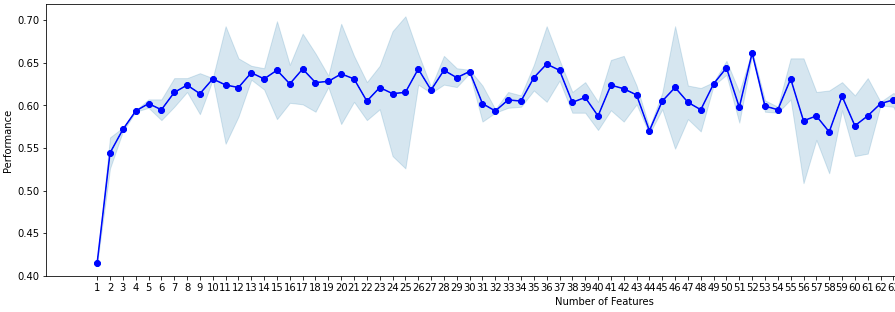

____

### 6. Build Model:

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('Variables.csv')

In [5]:
data.shape

(96397, 538)

In [6]:
data1 = pd.read_csv('card transactions.csv')
data1 = data1[data1['Amount'] != 3102045.53]
data1 = data1[data1['Transtype'] == 'P']

In [7]:
data['Fraud'] = data1.reset_index()['Fraud']
data1['Fraud'].sum() == data['Fraud'].sum()

True

In [8]:
data.reset_index()
data1.reset_index()

,index,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96748,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96393,96749,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96394,96750,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96395,96751,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
top30 = pd.read_csv('top30.csv')
col = top30.iloc[:,1]
cols = col.to_list()

In [10]:
cols = cols[0:30]
print(len(cols))

30


In [11]:
X_trntst = data.loc[0:69046,cols]
Y_trntst = data.loc[0:69046,'Fraud']
Y_trntst = pd.DataFrame(Y_trntst)
X_oot_orig = data.loc[69046:,cols]
Y_oot = data.loc[69046:,'Fraud']
Y_oot = pd.DataFrame(Y_oot)
Y_oot_array = Y_oot.values

In [14]:
FDR3 = pd.DataFrame({'trn':[0,0,0,0,0,0,0,0,0,0],'tst':[0,0,0,0,0,0,0,0,0,0],'oot':[0,0,0,0,0,0,0,0,0,0]})
FDR20 = pd.DataFrame({'Rno':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'Gno':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'Bno':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      'Gr':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'Br':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'Rtotal':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      'CG':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'CB':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'CGr':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      'CBr':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'KS':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'FPR':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

### Use logistic regression as a baseline model. Every model iterate 10 times to see if there is over-fitting.
### Manually validation

In [18]:
nitermax=10

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst ,Y_trntst, test_size = 0.3)
    
    model = LogisticRegression(
                         )
    
    X_oot = X_oot_orig.copy()
    
    X_trn_array = X_trn.values
    X_tst_array = X_tst.values
    X_oot_array = X_oot.values
    Y_trn_array = Y_trn.values
    Y_tst_array = Y_tst.values
    Y_oot_array = Y_oot.values
    
    X_trn_eval = X_trn.copy()
    X_tst_eval = X_tst.copy()
    X_oot_eval = X_oot.copy()
    
    model.fit(X_trn, Y_trn.values.ravel())
    predictions = model.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn['Fraud']
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending = False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    #metric to evaluate performance
    
    predictions = model.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']= Y_tst['Fraud']
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp = X_tst_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']= Y_oot['Fraud']
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp = X_oot_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    
    print(niter,FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])

FDR3.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0 0.3729508196721312 0.3953488372093023 0.2752808988764045


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 0.38923395445134573 0.32272727272727275 0.26685393258426965


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 0.39293139293139295 0.4009009009009009 0.2893258426966292


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 0.3884462151394422 0.3781094527363184 0.300561797752809


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 0.3721881390593047 0.42990654205607476 0.300561797752809


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 0.3797979797979798 0.36538461538461536 0.2808988764044944


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6 0.36875 0.34080717488789236 0.25280898876404495


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7 0.3673469387755102 0.36619718309859156 0.27808988764044945


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8 0.3967280163599182 0.35514018691588783 0.29775280898876405
9 0.38784067085953877 0.3584070796460177 0.27247191011235955


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


trn    0.381621
tst    0.371293
oot    0.281461
dtype: float64

### Then try different models and different parameters tuning, trying to defeat baseline model.

### After try neural network, random forest and gradient boosted tree, random forest is the best model.

In [19]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst ,Y_trntst, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 150,
                     #max_features = 25,
                     min_samples_leaf = 8,
                     max_depth = 30,
                     min_samples_split=8
                     #max_iter = 1000,
                     #alpha = .0001,
                     #solver = 'sgd',
                     #verbose = 0,
                     #tol = .00001
                     #learning_rate = 'adaptive',
                     #learning_rate_init = .2 
                     )

X_oot = X_oot_orig.copy()

X_trn_array = X_trn.values
X_tst_array = X_tst.values
X_oot_array = X_oot.values
Y_trn_array = Y_trn.values
Y_tst_array = Y_tst.values
Y_oot_array = Y_oot.values

X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

model.fit(X_trn, Y_trn.values.ravel())
predictions = model.predict_proba(X_trn)[:,1]

X_trn_eval['predicted']=predictions
X_trn_eval['Fraud']=Y_trn['Fraud']

___

# 7. Evaluate the model:
### Performance of final model at out of time sample, which can mimic the real performance of the model

In [22]:
lenoot = len(X_oot)
#27351
badoot = Y_oot.Fraud.sum()
#356
goodoot =lenoot - badoot
#26995
froot =badoot/lenoot
froot

0.013015977477971554

In [23]:
p1 = round(lenoot* 0.01)
#274
p20 = p1*20
p20

5480

In [24]:
predictions = model.predict_proba(X_oot)[:,1]

X_oot_eval['predicted']=predictions
X_oot_eval['Fraud']= Y_oot['Fraud']
temp = X_oot_eval.sort_values('predicted', ascending = False).head(p20)
needed = temp.loc[:,'Fraud']
needed = needed.reset_index()

In [25]:
for i in range(20):
    bg = (p1)*(i+1) - p1
    ed = (p1)*(i+1)
    x = needed.iloc[bg:ed,1].sum()
    FDR20.iloc[i,0] = p1
    FDR20.iloc[i,1] = p1 - x
    FDR20.iloc[i,2] = x
    FDR20.iloc[i,3] = (p1-x)/p1 *100
    FDR20.iloc[i,4] = x/p1 *100
    FDR20.iloc[i,5] = p1*(i+1)
    FDR20.iloc[i,6] = FDR20.iloc[:,1].sum()
    FDR20.iloc[i,7] = FDR20.iloc[:,2].sum()
    FDR20.iloc[i,8] = FDR20.iloc[i,6] / goodoot *100
    FDR20.iloc[i,9] = FDR20.iloc[i,7] / badoot *100
    FDR20.iloc[i,10] = FDR20.iloc[i,9] - FDR20.iloc[i,8]
    FDR20.iloc[i,11] = FDR20.iloc[i,6] / FDR20.iloc[i,7]

In [26]:
FDR20

,Rno,Gno,Bno,Gr,Br,Rtotal,CG,CB,CGr,CBr,KS,FPR
0,274,117,157,42.700730,57.299270,274,117,157,0.433414,44.101124,43.667710,0.745223
1,274,225,49,82.116788,17.883212,548,342,206,1.266901,57.865169,56.598267,1.660194
2,274,260,14,94.890511,5.109489,822,602,220,2.230043,61.797753,59.567710,2.736364
3,274,259,15,94.525547,5.474453,1096,861,235,3.189480,66.011236,62.821756,3.663830
4,274,264,10,96.350365,3.649635,1370,1125,245,4.167438,68.820225,64.652786,4.591837
5,274,268,6,97.810219,2.189781,1644,1393,251,5.160215,70.505618,65.345403,5.549801
6,274,267,7,97.445255,2.554745,1918,1660,258,6.149287,72.471910,66.322623,6.434109
7,274,263,11,95.985401,4.014599,2192,1923,269,7.123541,75.561798,68.438256,7.148699
8,274,270,4,98.540146,1.459854,2466,2193,273,8.123727,76.685393,68.561667,8.032967
9,274,260,14,94.890511,5.109489,2740,2453,287,9.086868,80.617978,71.531110,8.547038


### To find the cut-off point

In [27]:
temp = X_oot_eval.sort_values('predicted', ascending = False)
needed = temp.loc[:,'Fraud']
needed = needed.reset_index()

saving = pd.DataFrame({'Bins':range(101),'Fraud Savings':np.zeros(101),'Lost Sales':np.zeros(101),'Overall Savings':np.zeros(101)})
saving

,Bins,Fraud Savings,Lost Sales,Overall Savings
0,0,0.0,0.0,0.0
1,1,0.0,0.0,0.0
2,2,0.0,0.0,0.0
3,3,0.0,0.0,0.0
4,4,0.0,0.0,0.0
...,...,...,...,...
96,96,0.0,0.0,0.0
97,97,0.0,0.0,0.0
98,98,0.0,0.0,0.0
99,99,0.0,0.0,0.0


In [28]:
saving.iloc[0,1] = 900000
saving.iloc[0,3] = saving.iloc[0,1] - saving.iloc[0,2]
saving

,Bins,Fraud Savings,Lost Sales,Overall Savings
0,0,900000.0,0.0,900000.0
1,1,0.0,0.0,0.0
2,2,0.0,0.0,0.0
3,3,0.0,0.0,0.0
4,4,0.0,0.0,0.0
...,...,...,...,...
96,96,0.0,0.0,0.0
97,97,0.0,0.0,0.0
98,98,0.0,0.0,0.0
99,99,0.0,0.0,0.0


In [30]:
y = 0
for i in range(1,100):
    bg = (p1)*i - p1
    ed = (p1)*i
    x = needed.iloc[bg:ed,1].sum()
    y = y+x
    saving.iloc[i,1] = y*2000 + 900000
    saving.iloc[i,2] = (i*p1 - y) * 50
    saving.iloc[i,3] = saving.iloc[i,1] - saving.iloc[i,2]
    
saving.iloc[100,1] = 1506000
saving.iloc[100,2] = goodoot*50
saving.iloc[100,3] = saving.iloc[100,1] - saving.iloc[100,2]
saving

,Bins,Fraud Savings,Lost Sales,Overall Savings
0,0,900000.0,0.0,900000.0
1,1,1214000.0,5850.0,1208150.0
2,2,1312000.0,17100.0,1294900.0
3,3,1340000.0,30100.0,1309900.0
4,4,1370000.0,43050.0,1326950.0
...,...,...,...,...
96,96,1596000.0,1297800.0,298200.0
97,97,1596000.0,1311500.0,284500.0
98,98,1602000.0,1325050.0,276950.0
99,99,1610000.0,1338550.0,271450.0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=2)

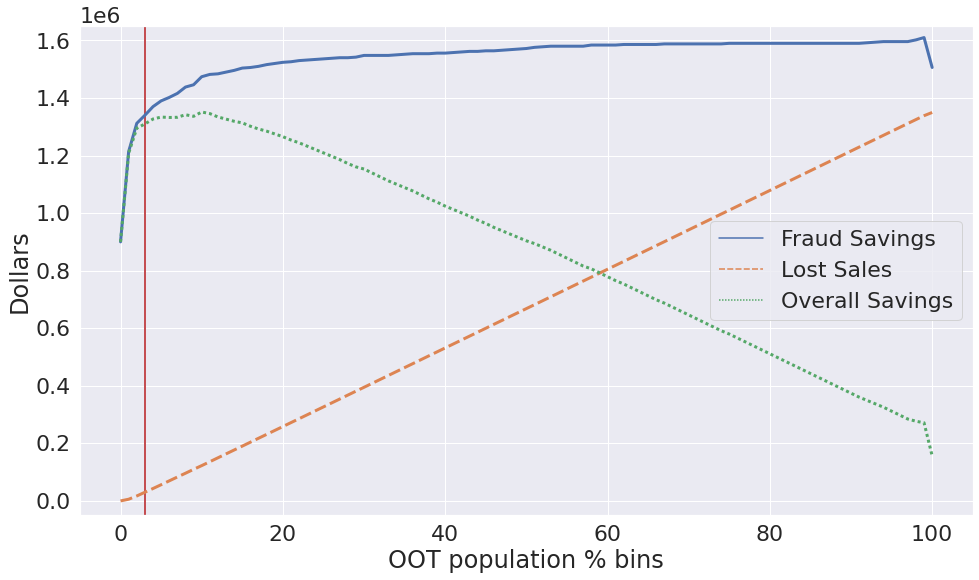

In [33]:
sns.lineplot(data=saving.iloc[:,[1,2,3]],linewidth = 3)
plt.vlines(x=3,ymin=-50000,ymax=1650000,color='r',linewidth = 2)
#hlines(y,xmin,xmax)
plt.ylim(-50000,1650000)
#plt.xlim(0,100)
plt.xlabel('OOT population % bins')
plt.ylabel('Dollars')
plt.show()